In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import erf

In [2]:
# interested in comparing to Athanassoula+13, the enclosed mass of their dark matter profile compared
# to a vanilla Hernquist profile

def Mh_hernquist(r, a, M):
    return M * r * r / ((r+a)**2)

def Mh_trunc(r, rc, gamma, M):
    q = gamma/rc
    alpha = 1./(1.-np.sqrt(np.pi)*q*np.exp(q*q)*(1-erf(q)))
    
    Mh = []
    for r_ in r:
        xlist = np.linspace(0, r_/rc, 1000)
        ylist = xlist**2 * np.exp(-xlist*xlist) / (xlist*xlist + q*q)
        integr = np.trapz(ylist, xlist)
        Mh.append(2*M * alpha / np.sqrt(np.pi) * integr)
    
    return np.array(Mh)

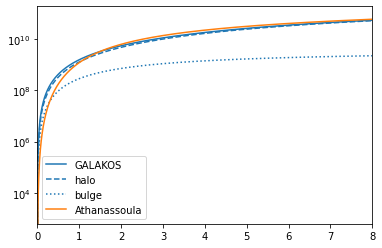

In [3]:
rlist = np.linspace(0, 10, 1000)
Menc_hern = Mh_hernquist(rlist, 26.2432, 9.50593E11)
Menc_bulge = Mh_hernquist(rlist, 2.75008, 4.02792E9)
Menc_trunc = Mh_trunc(rlist, 30, 1.5, 2.5E11)

l = plt.plot(rlist, Menc_hern+Menc_bulge, label='GALAKOS')
plt.plot(rlist, Menc_hern, label='halo', c=l[0].get_color(), ls='dashed')
plt.plot(rlist, Menc_bulge, label='bulge', c=l[0].get_color(), ls='dotted')
plt.plot(rlist, Menc_trunc, label='Athanassoula')

plt.legend()

plt.xlim(0, 8)
# plt.ylim(0, None)#0.2E10)
# plt.ylim(0, 5E8)
plt.yscale('log')

plt.show()

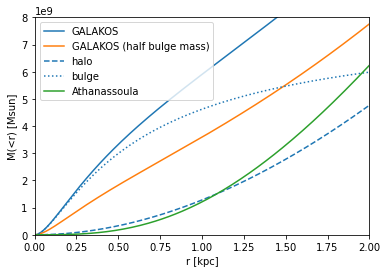

In [10]:
rlist = np.linspace(0, 10, 1000)
Menc_hern = Mh_hernquist(rlist, 26.2432, 9.50593E11)
Menc_bulge = Mh_hernquist(rlist, 0.12*2.67074, 2*4.02792E9)
Menc_halfbulge = Mh_hernquist(rlist, 0.12*2.67074, 4.02792E9)
Menc_trunc = Mh_trunc(rlist, 30, 1.5, 2.5E11)

l = plt.plot(rlist, Menc_hern+Menc_bulge, label='GALAKOS')
plt.plot(rlist, Menc_hern+Menc_halfbulge, label='GALAKOS (half bulge mass)')
plt.plot(rlist, Menc_hern, label='halo', c=l[0].get_color(), ls='dashed')
plt.plot(rlist, Menc_bulge, label='bulge', c=l[0].get_color(), ls='dotted')
plt.plot(rlist, Menc_trunc, label='Athanassoula')

plt.legend()

plt.xlim(0, 2)
plt.ylim(0, 8E9)
# plt.ylim(0, None)#0.2E10)
# plt.ylim(0, 5E8)
# plt.yscale('log')
plt.xlabel('r [kpc]')
plt.ylabel('M(<r) [Msun]')

plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


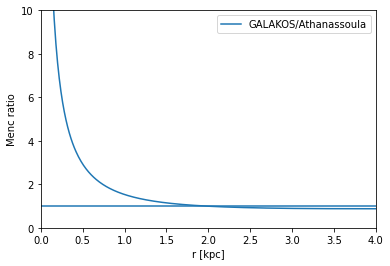

In [5]:
rlist = np.linspace(0, 10, 1000)
Menc_hern = Mh_hernquist(rlist, 26.2432, 9.50593E11)
Menc_bulge = Mh_hernquist(rlist, 2.75008, 2*4.02792E9)
Menc_trunc = Mh_trunc(rlist, 30, 1.5, 2.5E11)

l = plt.plot(rlist, (Menc_hern+Menc_bulge)/Menc_trunc, label='GALAKOS/Athanassoula')
# plt.plot(rlist, Menc_hern, label='halo', c=l[0].get_color(), ls='dashed')
# plt.plot(rlist, Menc_bulge, label='bulge', c=l[0].get_color(), ls='dotted')
# plt.plot(rlist, Menc_trunc, label='Athanassoula')

plt.legend()

plt.xlim(0, 4)
plt.ylim(0, 10)
# plt.ylim(0, None)#0.2E10)
# plt.ylim(0, 5E8)
# plt.yscale('log')
plt.axhline(1)

plt.xlabel('r [kpc]')
plt.ylabel('Menc ratio')

plt.show()

In [6]:
V200 = 163.
CC = 11.

MD = 0.048
MB = 0.008


# begin structure
M200 = V200**3 / (10. * G * H0)
R200 = V200 / (10. * H0)
RS = R200/CC

M_DISK = MD * M200
M_BULGE = MB * M200
M_HALO = M200 - M_DISK - M_BULGE
RH = RS * np.sqrt(2 * (np.log(1 + CC) - CC / (1 + CC)))

NameError: name 'G' is not defined

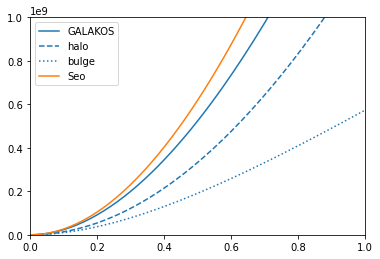

In [14]:
rlist = np.linspace(0, 10, 1000)
Menc_hern = Mh_hernquist(rlist, 26.2432, 9.50593E11)
Menc_bulge = Mh_hernquist(rlist, 2.75008, 2*4.02792E9)
Menc_Seo = Mh_hernquist(rlist, 10.7, 3.1E11)

l = plt.plot(rlist, Menc_hern+Menc_bulge, label='GALAKOS')
plt.plot(rlist, Menc_hern, label='halo', c=l[0].get_color(), ls='dashed')
plt.plot(rlist, Menc_bulge, label='bulge', c=l[0].get_color(), ls='dotted')
plt.plot(rlist, Menc_Seo, label='Seo')

plt.legend()

plt.xlim(0, 1)
plt.ylim(0, 1E9)
# plt.ylim(0, None)#0.2E10)
# plt.ylim(0, 5E8)
# plt.yscale('log')

plt.show()

In [11]:
Mh_hernquist(100, 26.2432, 9.50593E11)/1E10

59.64562901908514

5.964562901908514
4.227877334077393


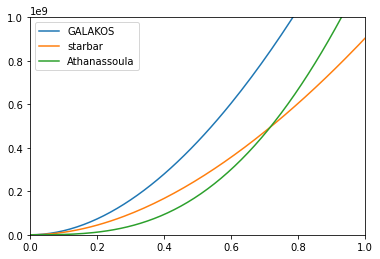

In [22]:
Mhern = 9.50593E11
Rhern = 26.2432

Menc_bulge = Mh_hernquist(rlist, 2.75008, 4.02792E9)
Menc_halo_GALAKOS = Mh_hernquist(rlist, Rhern, Mhern)

print(Mh_hernquist(100, Rhern, Mhern)/1e11)

Mhern *= 0.8
Rhern *= 1.3

rlist = np.linspace(0, 10, 1000)
Menc_halo = Mh_hernquist(rlist, Rhern, Mhern)
Menc_bulge = Mh_hernquist(rlist, 2.75008, 4.02792E9)
Menc_trunc = Mh_trunc(rlist, 30, 1.5, 2.5E11)

print(Mh_hernquist(100, Rhern, Mhern)/1e11)

l = plt.plot(rlist, Menc_halo_GALAKOS+Menc_bulge, label='GALAKOS')
plt.plot(rlist, Menc_halo+Menc_bulge, label='starbar')
# plt.plot(rlist, Menc_hern, label='halo', c=l[0].get_color(), ls='dashed')
# plt.plot(rlist, Menc_bulge, label='bulge', c=l[0].get_color(), ls='dotted')
plt.plot(rlist, Menc_trunc, label='Athanassoula')

plt.legend()

plt.xlim(0, 1)
plt.ylim(0, 1E9)
# plt.ylim(0, None)#0.2E10)
# plt.ylim(0, 5E8)
# plt.yscale('log')

plt.show()